## Подготовка данных в pandas

In [1]:
# отключаем предупреждения
import warnings
warnings.filterwarnings("ignore")

# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('C:/Trees/Churn_logreg.csv', encoding = 'cp1251', sep = ';')

In [3]:
# выводим первые 5 наблюдений датафрейма
data.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,"27,09",0,"39,74",Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680,Остается
1,NaN,0,"46,31",Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,"37111,5",Остается
2,"23,76",0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,"37079,4",Остается
3,"9,4",NaN,"13,9",Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997,Остается
4,"14,15",0,"108,43",Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,"16829,6",Остается


In [4]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null object
internat    4427 non-null object
local       4428 non-null object
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null object
churn       4431 non-null object
dtypes: float64(2), object(10)
memory usage: 415.5+ KB


In [5]:
# заменяем запятые на точки и преобразуем в тип float
for i in ['longdist', 'internat', 'local', 'income']:
    if i in data.columns:
        data[i] = data[i].str.replace(',', '.').astype('float')
data.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,27.09,0.0,39.74,Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680.0,Остается
1,NaN,0.0,46.31,Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,37111.5,Остается
2,23.76,0.0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,37079.4,Остается
3,9.40,NaN,13.90,Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997.0,Остается
4,14.15,0.0,108.43,Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,16829.6,Остается


In [6]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null float64
internat    4427 non-null float64
local       4428 non-null float64
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null float64
churn       4431 non-null object
dtypes: float64(6), object(6)
memory usage: 415.5+ KB


In [7]:
# смотрим статистики для количественных переменных
data.describe()

,longdist,internat,local,age,children,income
count,4430.000000,4427.000000,4428.000000,4428.000000,4430.000000,4430.000000
mean,13.638023,0.835044,51.361093,57.562331,0.988939,50296.423896
std,9.393025,2.233639,54.685012,22.832404,0.824448,28439.435264
min,0.000000,0.000000,0.050000,18.000000,0.000000,110.280000
25%,5.170000,0.000000,13.460000,38.000000,0.000000,25445.600000
50%,13.680000,0.000000,35.010000,58.000000,1.000000,50290.700000
75%,22.080000,0.000000,71.660000,77.000000,2.000000,75004.500000
max,29.980000,9.950000,450.620000,97.000000,2.000000,99832.900000


In [8]:
def make_conj(df, feature1, feature2):
    df[feature1 + "_" + feature2] = df[feature1].astype('object') + " + " + df[feature2].astype('object')

In [9]:
make_conj(data, 'gender', 'marital')

In [10]:
# смотрим статистики для категориальных переменных,
# кроме зависимой переменной churn
categorical_columns = [c for c in data.loc[:, data.columns != 'churn'] if data[c].dtype.name == 'object']
data[categorical_columns].describe()

,int_disc,billtype,pay,gender,marital,gender_marital
count,4430,4427,4429,4430,4427,4427
unique,2,2,4,2,2,4
top,Нет,Бюджетный,CC,Женский,Женат,Женский + Женат
freq,3054,2244,2561,2244,2625,1352


In [11]:
# смотрим уникальные значения
# категориальных переменных
for c in categorical_columns:
    print(data[c].unique())

['Нет' nan 'Да']
['Бюджетный' nan 'Бесплатный']
['CC' nan 'Auto' 'CH' 'CD']
['Женский' 'Мужской' nan]
['Женат' 'Одинокий' nan]
['Женский + Женат' 'Мужской + Одинокий' nan 'Женский + Одинокий'
 'Мужской + Женат']


In [12]:
# смотрим частоты категорий для
# категориальных переменных
for c in categorical_columns:
    print(data[c].value_counts(dropna = False))

Нет    3054
Да     1376
NaN       1
Name: int_disc, dtype: int64
Бюджетный     2244
Бесплатный    2183
NaN              4
Name: billtype, dtype: int64
CC      2561
CH       977
Auto     889
CD         2
NaN        2
Name: pay, dtype: int64
Женский    2244
Мужской    2186
NaN           1
Name: gender, dtype: int64
Женат       2625
Одинокий    1802
NaN            4
Name: marital, dtype: int64
Женский + Женат       1352
Мужской + Женат       1273
Мужской + Одинокий     912
Женский + Одинокий     890
NaN                      4
Name: gender_marital, dtype: int64


In [13]:
# заменяем редкую категорию модой
data.at[data['pay'] == 'CD', 'pay'] = 'CC'
data['pay'].value_counts(dropna = False)

CC      2563
CH       977
Auto     889
NaN        2
Name: pay, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 13 columns):
longdist          4430 non-null float64
internat          4427 non-null float64
local             4428 non-null float64
int_disc          4430 non-null object
billtype          4427 non-null object
pay               4429 non-null object
age               4428 non-null float64
gender            4430 non-null object
marital           4427 non-null object
children          4430 non-null float64
income            4430 non-null float64
churn             4431 non-null object
gender_marital    4427 non-null object
dtypes: float64(6), object(7)
memory usage: 450.1+ KB


In [15]:
data.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn,gender_marital
0,27.09,0.0,39.74,Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680.0,Остается,Женский + Женат
1,NaN,0.0,46.31,Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,37111.5,Остается,Мужской + Одинокий
2,23.76,0.0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,37079.4,Остается,NaN
3,9.40,NaN,13.90,Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997.0,Остается,Мужской + Одинокий
4,14.15,0.0,108.43,Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,16829.6,Остается,Женский + Одинокий


In [16]:
# поделим возраст на длительность междугородних звонков в минутах
data['ratio'] = data['age']/data['longdist']
# заменяем бесконечные значения на 1
data['ratio'].replace([np.inf, -np.inf], 1, inplace = True)

In [17]:
# поделим длительность междугородних звонков в минутах на
# длительность международных звонков в минутах
data['ratio2'] = data['longdist']/data['internat']
# заменяем бесконечные значения на 0
data['ratio2'].replace([np.inf, -np.inf], 0, inplace = True)

In [18]:
# поделим доход на возраст
data['ratio3'] = data['income']/data['age']
# заменяем бесконечные значения на 0
data['ratio3'].replace([np.inf, -np.inf], 0, inplace=True)

In [19]:
# поделим возраст на количество детей
data['ratio4'] = data['age']/data['children']
# заменяем бесконечные значения на 0
data['ratio4'].replace([np.inf, -np.inf], 0, inplace = True)

In [20]:
# разбиваем данные на обучающую и контрольную выборки
train = data.sample(frac = 0.7, random_state = 200)
test = data.drop(train.index)

In [21]:
# выводим информацию о количестве пропусков
# по каждой переменной в обучающей выборке
train.isnull().sum()

longdist            1
internat            4
local               2
int_disc            0
billtype            4
pay                 2
age                 2
gender              1
marital             3
children            1
income              1
churn               0
gender_marital      3
ratio               3
ratio2            336
ratio3              2
ratio4              2
dtype: int64

In [22]:
# выводим информацию о количестве пропусков
# по каждой переменной в контрольной выборке
test.isnull().sum()

longdist            0
internat            0
local               1
int_disc            1
billtype            0
pay                 0
age                 1
gender              0
marital             1
children            0
income              0
churn               0
gender_marital      1
ratio               1
ratio2            161
ratio3              1
ratio4              1
dtype: int64

In [23]:
numerical_columns = train.dtypes[train.dtypes != 'object'].index 
for i in numerical_columns:
    train[i].fillna(train[i].mean(), inplace = True)
    test[i].fillna(train[i].mean(), inplace = True)

In [24]:
for i in categorical_columns:
    train[i].fillna(train[i].value_counts().index[0], inplace = True)
    test[i].fillna(train[i].value_counts().index[0], inplace = True)

In [25]:
for c in categorical_columns:
    print(train[c].value_counts(dropna=False))

Нет    2139
Да      963
Name: int_disc, dtype: int64
Бюджетный     1569
Бесплатный    1533
Name: billtype, dtype: int64
CC      1810
CH       688
Auto     604
Name: pay, dtype: int64
Мужской    1553
Женский    1549
Name: gender, dtype: int64
Женат       1821
Одинокий    1281
Name: marital, dtype: int64
Женский + Женат       930
Мужской + Женат       891
Мужской + Одинокий    660
Женский + Одинокий    621
Name: gender_marital, dtype: int64


In [26]:
train.isnull().sum()

longdist          0
internat          0
local             0
int_disc          0
billtype          0
pay               0
age               0
gender            0
marital           0
children          0
income            0
churn             0
gender_marital    0
ratio             0
ratio2            0
ratio3            0
ratio4            0
dtype: int64

In [27]:
test.isnull().sum()

longdist          0
internat          0
local             0
int_disc          0
billtype          0
pay               0
age               0
gender            0
marital           0
children          0
income            0
churn             0
gender_marital    0
ratio             0
ratio2            0
ratio3            0
ratio4            0
dtype: int64

In [28]:
train.replace({0: 0.5}, inplace=True)
test.replace({0: 0.5}, inplace=True)

In [29]:
pd.set_option('max_colwidth', 800)

In [30]:
from scipy.stats import boxcox
for i in numerical_columns:  
    train[i], fitted_lambda = boxcox(train[i])     
    test[i] = boxcox(test[i], fitted_lambda)   

In [31]:
# печатаем названия столбцов до и после
# дамми-кодирования
print('Исходные переменные:\n', list(train.columns), '\n')
train_dummies = pd.get_dummies(train)
print('Переменные после get_dummies:\n', list(train_dummies.columns))

print('Исходные переменные:\n', list(test.columns), '\n')
test_dummies = pd.get_dummies(test)
print('Переменные после get_dummies:\n', list(test_dummies.columns))

Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn', 'gender_marital', 'ratio', 'ratio2', 'ratio3', 'ratio4'] 

Переменные после get_dummies:
 ['longdist', 'internat', 'local', 'age', 'children', 'income', 'ratio', 'ratio2', 'ratio3', 'ratio4', 'int_disc_Да', 'int_disc_Нет', 'billtype_Бесплатный', 'billtype_Бюджетный', 'pay_Auto', 'pay_CC', 'pay_CH', 'gender_Женский', 'gender_Мужской', 'marital_Женат', 'marital_Одинокий', 'churn_Остается', 'churn_Уходит', 'gender_marital_Женский + Женат', 'gender_marital_Женский + Одинокий', 'gender_marital_Мужской + Женат', 'gender_marital_Мужской + Одинокий']
Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn', 'gender_marital', 'ratio', 'ratio2', 'ratio3', 'ratio4'] 

Переменные после get_dummies:
 ['longdist', 'internat', 'local', 'age', 'children', 'income', 'ratio

In [32]:
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'churn_Уходит']
y_test = test_dummies.loc[:, 'churn_Уходит']
# создаем обучающий и контрольный массивы признаков
train_dummies.drop(['churn_Остается', 'churn_Уходит'], axis = 1, inplace = True)
test_dummies.drop(['churn_Остается', 'churn_Уходит'], axis = 1, inplace = True)
X_train = train_dummies.loc[:, 'longdist':'gender_marital_Мужской + Одинокий']
X_test = test_dummies.loc[:, 'longdist':'gender_marital_Мужской + Одинокий']

In [33]:
# смотрим распределение классов зависимой 
# переменной в выборках (проценты)
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

0    0.56383
1    0.43617
Name: churn_Уходит, dtype: float64
0    0.562077
1    0.437923
Name: churn_Уходит, dtype: float64


In [34]:
# применяем RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Построение модели логистической регрессии с помощью класса LogisticRegression

In [35]:
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression
# создаем экземпляр класса LogisticRegression (по сути
# задаем настройки панели)
logreg = LogisticRegression().fit(X_train_scaled, y_train)
# печатаем значения правильности
print('Правильность на обучающей выборке: {:.3f}'.format(logreg.score(X_train_scaled, y_train)))
print('Правильность на контрольной выборке: {:.3f}'.format(logreg.score(X_test_scaled, y_test)))

Правильность на обучающей выборке: 0.810
Правильность на контрольной выборке: 0.808


In [36]:
# импортируем функцию roc_auc_score для вычисления AUC
from sklearn.metrics import roc_auc_score
print('AUC на обучающей выборке: {:.3f}'.
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:, 1])))
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])))

AUC на обучающей выборке: 0.885
AUC на контрольной выборке: 0.888


In [37]:
# конкатенируем датафреймы по строкам
X = pd.concat([X_train, X_test], axis = 0)
y = pd.concat([y_train, y_test], axis = 0)

In [38]:
# убедимся, что конкатенция выполнена верно
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4431 entries, 2157 to 4430
Data columns (total 25 columns):
longdist                             4431 non-null float64
internat                             4431 non-null float64
local                                4431 non-null float64
age                                  4431 non-null float64
children                             4431 non-null float64
income                               4431 non-null float64
ratio                                4431 non-null float64
ratio2                               4431 non-null float64
ratio3                               4431 non-null float64
ratio4                               4431 non-null float64
int_disc_Да                          4431 non-null uint8
int_disc_Нет                         4431 non-null uint8
billtype_Бесплатный                  4431 non-null uint8
billtype_Бюджетный                   4431 non-null uint8
pay_Auto                             4431 non-null uint8
pay_CC         

In [39]:
# импортируем функцию и класс для выполнения
# перекрестной проверки
from sklearn.model_selection import cross_val_score, KFold
# создаем экземпляр класса KFold, по сути задаем 
# количество блоков перекрестной проверки
kfold = KFold(n_splits = 10)
# выполняем перекрестную проверку, вычисляем правильность,
# усредненную по 10 контрольным блокам
scores_acc_logreg = cross_val_score(logreg, X, y, cv = kfold)
print('Среднее значение правильности перекрестной проверки: {:.2f}'.
      format(scores_acc_logreg.mean()))

Среднее значение правильности перекрестной проверки: 0.81


In [40]:
# выполняем перекрестную проверку, вычисляем AUC,
# усредненную по 10 контрольным блокам
scores_auc_logreg = cross_val_score(logreg, X, y, scoring = 'roc_auc', cv = kfold)
print('Среднее значение AUC перекрестной проверки: {:.2f}'.
      format(scores_auc_logreg.mean()))

Среднее значение AUC перекрестной проверки: 0.88


In [41]:
# пишем функцию, выполняющую биннинг
def user_bin(train, number):
    tv = 'churn'
    col_list = []  
    iv_list = []
    bins_list = [] 
    groups_list = []      
    a= 0.01  
    for var_name in train: 
        # используем для биннинга переменные с более чем 24 уникальными значениями 
        if(len(train[var_name].unique()) >= 24):
            col_list.append(var_name)  
    print('У нас ' + str(len(col_list)) + ' переменных, пригодных для биннинга')    
    for var_name in col_list:  
        num = number  
        bins = np.linspace(train[var_name].min(), train[var_name].max(), num) 
        rounded_bins = np.round(bins, 2)
        groups = np.digitize(train[var_name], bins)        
        biv = pd.crosstab(groups, train[tv])   
        # умножаем на 1.0, чтобы преобразовать во float и добавляем "a=0.01", чтобы избежать деления на ноль
        WoE = np.log((1.0*biv['Остается']/sum(biv['Остается']) + a) / (1.0*biv['Уходит']/sum(biv['Уходит']) + a))
        IV = sum(((1.0*biv['Остается']/sum(biv['Остается']) + a) - (1.0*biv['Уходит']/sum(biv['Уходит']) + a))*np.log((1.0*biv['Остается']/sum(biv['Остается']) + a) / (1.0*biv['Уходит']/sum(biv['Уходит']) + a)))
        iv_list.append(IV) 
        bins_list.append(num)        
        groups_list.append(rounded_bins)
    result = pd.DataFrame({'Переменная' : col_list, 
                           'Бины': groups_list, 
                           'IV' : iv_list,
                           'Количество_бинов' : bins_list})    
    return(result.sort_values(by = 'IV', ascending = False))

In [42]:
user_bin(train, 10)

У нас 9 переменных, пригодных для биннинга


,Переменная,Бины,IV,Количество_бинов
6,ratio2,"[-9.01, -7.81, -6.61, -5.41, -4.2, -3.0, -1.8, -0.6, 0.61, 1.81]",0.756717,10
0,longdist,"[-1.46, -0.06, 1.35, 2.75, 4.16, 5.56, 6.97, 8.37, 9.77, 11.18]",0.433322,10
1,internat,"[-13.08, -11.46, -9.84, -8.22, -6.6, -4.98, -3.35, -1.73, -0.11, 1.51]",0.375355,10
5,ratio,"[-0.49, -0.14, 0.21, 0.56, 0.9, 1.25, 1.6, 1.95, 2.3, 2.64]",0.308490,10
2,local,"[-2.16, -0.42, 1.32, 3.06, 4.8, 6.54, 8.28, 10.02, 11.76, 13.5]",0.230167,10
3,age,"[11.4, 15.41, 19.42, 23.43, 27.44, 31.45, 35.46, 39.47, 43.48, 47.49]",0.119664,10
7,ratio3,"[1.25, 7.19, 13.13, 19.06, 25.0, 30.94, 36.87, 42.81, 48.75, 54.68]",0.067524,10
8,ratio4,"[-0.64, 0.38, 1.4, 2.42, 3.44, 4.46, 5.47, 6.49, 7.51, 8.53]",0.033225,10
4,income,"[40.64, 695.07, 1349.49, 2003.91, 2658.33, 3312.76, 3967.18, 4621.6, 5276.02, 5930.45]",0.021932,10


In [43]:
# выполняем биннинг переменной longdist
bins = [-np.inf, -0.06, 1.35, 2.75, 4.16, 5.56, 6.97, 8.37, 9.77, np.inf]
train['longdistcat'] = pd.cut(train['longdist'], bins).astype('object')
test['longdistcat'] = pd.cut(test['longdist'], bins).astype('object')

In [44]:
# выполняем биннинг переменной age
bins = [-np.inf, 15, 19, 23, 27, 32, 36, 40, 44, np.inf]
train['agecat'] = pd.cut(train['age'], bins).astype('object')
test['agecat'] = pd.cut(test['age'], bins).astype('object')

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 2157 to 4105
Data columns (total 19 columns):
longdist          3102 non-null float64
internat          3102 non-null float64
local             3102 non-null float64
int_disc          3102 non-null object
billtype          3102 non-null object
pay               3102 non-null object
age               3102 non-null float64
gender            3102 non-null object
marital           3102 non-null object
children          3102 non-null float64
income            3102 non-null float64
churn             3102 non-null object
gender_marital    3102 non-null object
ratio             3102 non-null float64
ratio2            3102 non-null float64
ratio3            3102 non-null float64
ratio4            3102 non-null float64
longdistcat       3102 non-null object
agecat            3102 non-null object
dtypes: float64(10), object(9)
memory usage: 484.7+ KB


In [46]:
# печатаем названия столбцов до и после
# дамми-кодирования
print('Исходные переменные:\n', list(train.columns), '\n')
train_dum = pd.get_dummies(train)
print('Переменные после get_dummies:\n', list(train_dum.columns))

print('Исходные переменные:\n', list(test.columns), '\n')
test_dum = pd.get_dummies(test)
print('Переменные после get_dummies:\n', list(test_dum.columns))

Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn', 'gender_marital', 'ratio', 'ratio2', 'ratio3', 'ratio4', 'longdistcat', 'agecat'] 

Переменные после get_dummies:
 ['longdist', 'internat', 'local', 'age', 'children', 'income', 'ratio', 'ratio2', 'ratio3', 'ratio4', 'int_disc_Да', 'int_disc_Нет', 'billtype_Бесплатный', 'billtype_Бюджетный', 'pay_Auto', 'pay_CC', 'pay_CH', 'gender_Женский', 'gender_Мужской', 'marital_Женат', 'marital_Одинокий', 'churn_Остается', 'churn_Уходит', 'gender_marital_Женский + Женат', 'gender_marital_Женский + Одинокий', 'gender_marital_Мужской + Женат', 'gender_marital_Мужской + Одинокий', 'longdistcat_(-inf, -0.06]', 'longdistcat_(-0.06, 1.35]', 'longdistcat_(1.35, 2.75]', 'longdistcat_(2.75, 4.16]', 'longdistcat_(4.16, 5.56]', 'longdistcat_(5.56, 6.97]', 'longdistcat_(6.97, 8.37]', 'longdistcat_(8.37, 9.77]', 'longdistcat_(9.77, inf]', 'agecat_(-inf, 15.0]', 'age

In [47]:
# создаем обучающий и контрольный массивы признаков
train_dum.drop(['churn_Остается', 'churn_Уходит'], axis = 1, inplace = True)
test_dum.drop(['churn_Остается', 'churn_Уходит'], axis = 1, inplace = True)
X_tr = train_dum.loc[:, 'longdist':'agecat_(44.0, inf]']
X_tst = test_dum.loc[:, 'longdist':'agecat_(44.0, inf]']

In [48]:
# применяем RobustScaler
scaler.fit(X_tr)
X_train_scaled2 = scaler.transform(X_tr)
X_test_scaled2 = scaler.transform(X_tst)

In [49]:
# строим логистическую регрессию
logreg2 = LogisticRegression().fit(X_train_scaled2, y_train)
from sklearn.metrics import roc_auc_score
print('AUC на обучающей выборке: {:.3f}'.
      format(roc_auc_score(y_train, logreg2.predict_proba(X_train_scaled2)[:, 1])))
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_test, logreg2.predict_proba(X_test_scaled2)[:, 1])))

AUC на обучающей выборке: 0.906
AUC на контрольной выборке: 0.902


In [50]:
# взглянем на коэффициенты логистической регрессии
# запишем коэффициенты и названия предикторов
# в отдельные объекты
coef = logreg2.coef_
feat_labels = X_train.columns

In [51]:
# вычислим свободный член (константу)
intercept = logreg2.intercept_
intercept

array([-1.21836593])

In [52]:
# переводим массив в скаляр
intercept = round(np.asscalar(intercept), 2)
intercept

-1.22

In [53]:
# печатаем название "Коэффициенты"
print('Коэффициенты:')
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(coef[0], feat_labels):
    print(feature, round(c, 2))
print('Константа:', intercept)

Коэффициенты:
longdist -0.41
internat 1.45
local -0.05
age -0.51
children -0.34
income 1.28
ratio -0.66
ratio2 0.3
ratio3 -1.46
ratio4 0.37
int_disc_Да -0.06
int_disc_Нет 0.06
billtype_Бесплатный 0.03
billtype_Бюджетный -0.03
pay_Auto -0.19
pay_CC 0.14
pay_CH 0.05
gender_Женский 1.09
gender_Мужской -1.09
marital_Женат 0.19
marital_Одинокий -0.19
gender_marital_Женский + Женат -0.03
gender_marital_Женский + Одинокий 0.43
gender_marital_Мужской + Женат -1.0
gender_marital_Мужской + Одинокий -0.62
Константа: -1.22


## Построение модели логистической регрессии с помощью класса H2OGeneralizedLinearEstimator библиотеки H2O

In [54]:
# перед импортом библиотеки h2o и модуля os убедитесь, что библиотека h2o установлена 
# (сначала установите Java SE Development Kit 8, обратите внимание, 
# 9-я версия H2O не поддерживается, а затем после установки Java 
# запустите Anaconda Prompt и установите h2o с помощью 
# строки pip install h2o)
import h2o
import os
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from C:\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Gewissta\AppData\Local\Temp\tmpkwons56t
  JVM stdout: C:\Users\Gewissta\AppData\Local\Temp\tmpkwons56t\h2o_Gewissta_started_from_python.out
  JVM stderr: C:\Users\Gewissta\AppData\Local\Temp\tmpkwons56t\h2o_Gewissta_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Moscow
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,2 months and 4 days
H2O cluster name:,H2O_from_python_Gewissta_pzcb8i
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [55]:
# импортируем библиотеку для транслитерации
from transliterate import translit

In [56]:
# сейчас нам надо задать переменные для транслитерации,
# давайте взглянем на наш список
categorical_columns

['int_disc', 'billtype', 'pay', 'gender', 'marital', 'gender_marital']

In [57]:
# с помощью метода .append() добавляем 
# в конец списка элемент "churn"
categorical_columns.append('churn')

In [58]:
# выполняем транслитерацию
for i in categorical_columns:
    train[i] = train[i].apply(lambda x: translit(x, 'ru', reversed = True))
    test[i] = test[i].apply(lambda x: translit(x, 'ru', reversed = True))

In [59]:
# смотрим результаты транслитерации
# на обучающем наборе
for c in categorical_columns:
    print(train[c].unique())

['Net' 'Da']
['Besplatnyj' 'Bjudzhetnyj']
['CC' 'Auto' 'CH']
['Zhenskij' 'Muzhskoj']
['Odinokij' 'Zhenat']
['Zhenskij + Odinokij' 'Muzhskoj + Odinokij' 'Muzhskoj + Zhenat'
 'Zhenskij + Zhenat']
['Uhodit' 'Ostaetsja']


In [60]:
# преобразовываем датафреймы pandas во фреймы h2o -
# специальную структуру данных, используемую h2o
tr = h2o.H2OFrame(train)
valid = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [61]:
# взглянем на обучающий фрейм, обратите внимание,
# сейчас метод .describe() - это метод h2o, а не 
# pandas
tr.describe()

Rows:3102
Cols:19




,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn,gender_marital,ratio,ratio2,ratio3,ratio4,longdistcat,agecat
type,real,real,real,enum,enum,enum,real,enum,enum,real,real,enum,enum,real,real,real,real,enum,enum
mins,-1.4617689427911926,-13.08449556508091,-2.1580812567551555,,,,11.396436178501588,,,-0.6960719136488698,40.643326803362754,,,-0.4877062594216891,-9.013842690079084,1.25308904519388,-0.6366263654316225,,
mean,5.742970499242988,-0.5370747814128165,5.386664483198979,,,,30.52168071447882,,,-0.00512307866064541,3468.5686242892657,,,0.9617353657773894,-0.40304415098964014,27.277132238642757,3.6691043858202272,,
maxs,11.178400979760111,1.5098544900087318,13.49998272989935,,,,47.49453722704369,,,0.6902388099495838,5930.446007291198,,,2.643851286791982,1.8073864804974216,54.682042805240066,8.530219660920261,,
sigma,3.7481925278363244,0.8241010726999622,2.6312437411889036,,,,10.29381349840921,,,0.5731208313495241,1562.1393133989668,,,0.6220214843175025,0.9060414985500521,9.063617518543097,3.3245488978079143,,
zeros,0,0,0,,,,0,,,981,0,,,331,0,0,0,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,10.830316215501012,-0.7973691896243745,3.0139764916030396,Net,Besplatnyj,CC,31.481124391227365,Zhenskij,Odinokij,0.0,4154.869955368662,Uhodit,Zhenskij + Odinokij,0.6380736609198995,-0.8426173419431201,29.48619007621708,7.0692912592036485,"(9.77, inf]","(27.0, 32.0]"
1,9.610612620935832,-0.7973691896243745,5.868418157380489,Net,Bjudzhetnyj,Auto,21.75945440417797,Muzhskoj,Odinokij,0.6902388099495838,3999.82979706269,Ostaetsja,Muzhskoj + Odinokij,0.4193175562637697,-0.8426173419431201,34.17417898296471,4.344087437405437,"(8.37, 9.77]","(19.0, 23.0]"
2,4.818142319084006,0.8114037387415547,9.706150923277695,Net,Bjudzhetnyj,CC,37.14164945190454,Muzhskoj,Odinokij,0.6902388099495838,3846.622500089806,Uhodit,Muzhskoj + Odinokij,1.4423283931834263,0.9230946546571864,26.217624680999545,5.786178007530157,"(4.16, 5.56]","(36.0, 40.0]"


In [62]:
# задаем название зависимой переменной
dependent = "churn"
# задаем список названий предикторов
predictors = list(tr.columns)
# удаляем название зависимой переменной из 
# списка названий предикторов
predictors.remove(dependent)

In [63]:
# импортируем класс H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [64]:
# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family = "binomial")
# обучаем модель
glm_model.train(predictors, dependent, training_frame = tr, 
                validation_frame = valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [65]:
# смотрим модель
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1532764996210_1


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.11712344296738288
RMSE: 0.34223302436699893
LogLoss: 0.37723004559597845
Null degrees of freedom: 3101
Residual degrees of freedom: 3065
Null deviance: 4249.593703095778
Residual deviance: 2340.3352028774502
AIC: 2414.3352028774502
AUC: 0.9065554089191289
Gini: 0.8131108178382578
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4141460817968022: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1347.0,402.0,0.2298,(402.0/1749.0)
Uhodit,74.0,1279.0,0.0547,(74.0/1353.0)
Total,1421.0,1681.0,0.1534,(476.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4141461,0.8431114,242.0
max f2,0.3666149,0.9039865,251.0
max f0point5,0.5906030,0.8127264,174.0
max accuracy,0.5004327,0.8513862,216.0
max precision,0.9963604,1.0,0.0
max recall,0.0257848,1.0,384.0
max specificity,0.9963604,1.0,0.0
max absolute_mcc,0.4141461,0.7121130,242.0
max min_per_class_accuracy,0.5482930,0.8359062,196.0
max mean_per_class_accuracy,0.5004327,0.8577515,216.0


Gains/Lift Table: Avg response rate: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0106383,0.9924436,2.2926829,2.2926829,1.0,1.0,0.0243902,0.0243902,129.2682927,129.2682927
,2,0.0203095,0.9915304,2.2162602,2.2562911,0.9666667,0.9841270,0.0214339,0.0458241,121.6260163,125.6291134
,3,0.0303030,0.9907753,2.2926829,2.2682927,1.0,0.9893617,0.0229120,0.0687361,129.2682927,126.8292683
,4,0.0406190,0.9895103,2.2926829,2.2744870,1.0,0.9920635,0.0236511,0.0923873,129.2682927,127.4487031
,5,0.0506125,0.9871054,2.2926829,2.2780799,1.0,0.9936306,0.0229120,0.1152993,129.2682927,127.8079851
,6,0.1002579,0.9650600,2.0991448,2.1894753,0.9155844,0.9549839,0.1042129,0.2195122,109.9144758,118.9475335
,7,0.1505480,0.8738031,1.8223890,2.0668512,0.7948718,0.9014989,0.0916482,0.3111604,82.2388993,106.6851204
,8,0.2005158,0.7875814,1.8785208,2.0199200,0.8193548,0.8810289,0.0938655,0.4050259,87.8520850,101.9920006
,9,0.3004513,0.6741884,1.7749803,1.9384487,0.7741935,0.8454936,0.1773836,0.5824095,77.4980330,93.8448655
,10,0.4000645,0.5924858,1.7658852,1.8954816,0.7702265,0.8267526,0.1759054,0.7583149,76.5885232,89.5481614




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.12067494193572006
RMSE: 0.3473829902797776
LogLoss: 0.3889605191516569
Null degrees of freedom: 1328
Residual degrees of freedom: 1292
Null deviance: 1821.8635267830318
Residual deviance: 1033.8570599051043
AIC: 1107.8570599051043
AUC: 0.90195719878368
Gini: 0.8039143975673599
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4927777325090292: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,591.0,156.0,0.2088,(156.0/747.0)
Uhodit,45.0,537.0,0.0773,(45.0/582.0)
Total,636.0,693.0,0.1512,(201.0/1329.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4927777,0.8423529,228.0
max f2,0.3666426,0.9017191,256.0
max f0point5,0.5432537,0.8145525,205.0
max accuracy,0.5432537,0.8487585,205.0
max precision,0.9971022,1.0,0.0
max recall,0.0375800,1.0,376.0
max specificity,0.9971022,1.0,0.0
max absolute_mcc,0.4927777,0.7089744,228.0
max min_per_class_accuracy,0.5543460,0.8340027,199.0
max mean_per_class_accuracy,0.4927777,0.8569225,228.0


Gains/Lift Table: Avg response rate: 43,79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105342,0.9929117,2.2835052,2.2835052,1.0,1.0,0.0240550,0.0240550,128.3505155,128.3505155
,2,0.0203160,0.9919198,2.2835052,2.2835052,1.0,1.0,0.0223368,0.0463918,128.3505155,128.3505155
,3,0.0316027,0.9910749,1.9790378,2.1747668,0.8666667,0.9523810,0.0223368,0.0687285,97.9037801,117.4766814
,4,0.0413845,0.9903708,2.2835052,2.2004686,1.0,0.9636364,0.0223368,0.0910653,128.3505155,120.0468604
,5,0.0511663,0.9885174,2.2835052,2.2163432,1.0,0.9705882,0.0223368,0.1134021,128.3505155,121.6343238
,6,0.1000752,0.9748776,2.1078509,2.1633207,0.9230769,0.9473684,0.1030928,0.2164948,110.7850912,116.3320673
,7,0.1504891,0.8864644,1.8745192,2.0665722,0.8208955,0.905,0.0945017,0.3109966,87.4519157,106.6572165
,8,0.2001505,0.7909431,1.6607310,1.9658747,0.7272727,0.8609023,0.0824742,0.3934708,66.0731022,96.5874738
,9,0.3009782,0.6814408,1.7722727,1.9010180,0.7761194,0.8325,0.1786942,0.5721649,77.2272657,90.1018041
,10,0.4003010,0.5967379,1.6780303,1.8456903,0.7348485,0.8082707,0.1666667,0.7388316,67.8030303,84.5690257



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-07-28 11:03:26,0.000 sec,0,2124.7968515,0.6849764
,2018-07-28 11:03:27,0.072 sec,1,1309.0873834,0.4238135
,2018-07-28 11:03:27,0.095 sec,2,1189.3814342,0.3864905
,2018-07-28 11:03:27,0.113 sec,3,1171.3638979,0.3814327
,2018-07-28 11:03:27,0.129 sec,4,1170.3956244,0.3812703
,2018-07-28 11:03:27,0.151 sec,5,1170.1676014,0.3812486


In [66]:
# записываем таблицу коэффициентов
coeff_table = glm_model._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pondas
coeff_table.as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,4.873395,-0.461303
1,"longdistcat.(-0.06, 1.35]",0.254060,0.254060
2,"longdistcat.(-inf, -0.06]",1.673202,1.673202
3,"longdistcat.(1.35, 2.75]",-0.198700,-0.198700
4,"longdistcat.(2.75, 4.16]",0.078901,0.078901
5,"longdistcat.(4.16, 5.56]",0.040481,0.040481
6,"longdistcat.(5.56, 6.97]",-0.437946,-0.437946
7,"longdistcat.(6.97, 8.37]",-0.487870,-0.487870
8,"longdistcat.(8.37, 9.77]",-0.106539,-0.106539
9,"longdistcat.(9.77, inf]",-0.051121,-0.051121


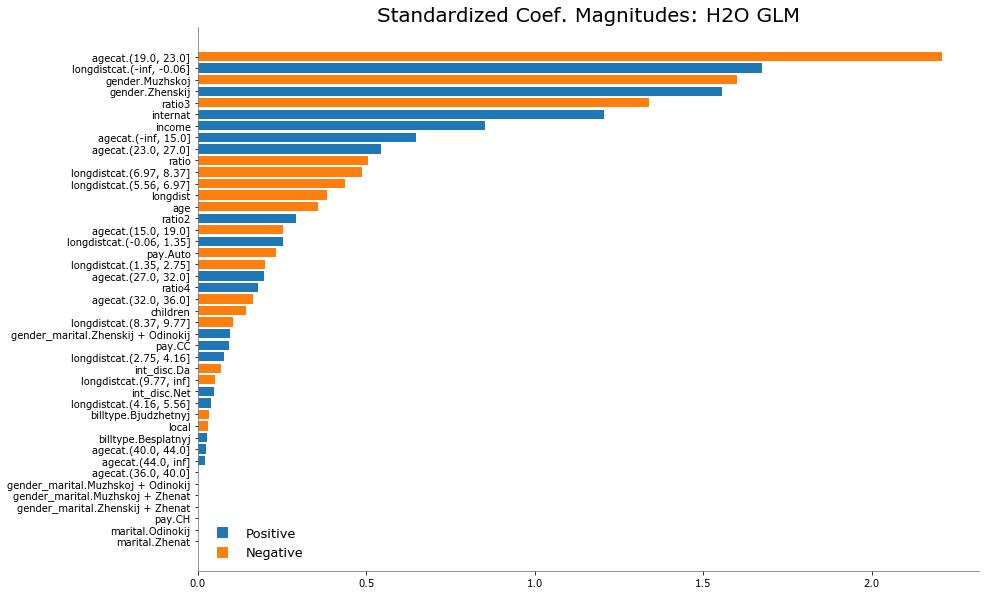

In [67]:
# выведем визуализацию коэффициентов
glm_model.std_coef_plot()

In [68]:
# выведем полный регуляризационный путь
H2OGeneralizedLinearEstimator.getGLMRegularizationPath(glm_model)

{'lambdas': [0.00031121627630842147],
 'explained_deviance_train': [1.7299521358336516],
 'explained_deviance_valid': [1.729472861420466],
 'coefficients': [{'longdistcat.(-0.06, 1.35]': 0.2540604886012202,
   'longdistcat.(-inf, -0.06]': 1.6732016004508172,
   'longdistcat.(1.35, 2.75]': -0.198699590978114,
   'longdistcat.(2.75, 4.16]': 0.07890083389108078,
   'longdistcat.(4.16, 5.56]': 0.04048106570170152,
   'longdistcat.(5.56, 6.97]': -0.4379462868854912,
   'longdistcat.(6.97, 8.37]': -0.4878701314021781,
   'longdistcat.(8.37, 9.77]': -0.10653928016388732,
   'longdistcat.(9.77, inf]': -0.05112107815416505,
   'agecat.(-inf, 15.0]': 0.6485379382792881,
   'agecat.(15.0, 19.0]': -0.25454969338522443,
   'agecat.(19.0, 23.0]': -2.207379473096358,
   'agecat.(23.0, 27.0]': 0.5429529499821721,
   'agecat.(27.0, 32.0]': 0.1968736620784558,
   'agecat.(32.0, 36.0]': -0.16415474580574685,
   'agecat.(36.0, 40.0]': 0.0,
   'agecat.(40.0, 44.0]': 0.025390561174431666,
   'agecat.(44.0, 

In [69]:
# еще можно добавлять взаимодействия признаков

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model2 = H2OGeneralizedLinearEstimator(family = "binomial", 
                                           interactions = ['longdistcat', 'gender', 'agecat'])
# обучаем модель
glm_model2.train(predictors, dependent, training_frame = tr, 
                validation_frame = valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [70]:
# смотрим модель
glm_model2

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1532764996210_4


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09780951636122548
RMSE: 0.3127451300359855
LogLoss: 0.30896294287353115
Null degrees of freedom: 3101
Residual degrees of freedom: 2992
Null deviance: 4249.593703095778
Residual deviance: 1916.8060975873873
AIC: 2136.8060975873873
AUC: 0.9358964281986497
Gini: 0.8717928563972994
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35383050288549195: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1402.0,347.0,0.1984,(347.0/1749.0)
Uhodit,71.0,1282.0,0.0525,(71.0/1353.0)
Total,1473.0,1629.0,0.1348,(418.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3538305,0.8598256,247.0
max f2,0.1674784,0.9270244,301.0
max f0point5,0.6182078,0.8311160,170.0
max accuracy,0.3844656,0.8662153,239.0
max precision,0.9989604,1.0,0.0
max recall,0.0616884,1.0,343.0
max specificity,0.9989604,1.0,0.0
max absolute_mcc,0.3538305,0.7439370,247.0
max min_per_class_accuracy,0.5432017,0.8559177,199.0
max mean_per_class_accuracy,0.3538305,0.8745625,247.0


Gains/Lift Table: Avg response rate: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103159,0.9984816,2.2926829,2.2926829,1.0,1.0,0.0236511,0.0236511,129.2682927,129.2682927
,2,0.0206319,0.9973283,2.2926829,2.2926829,1.0,1.0,0.0236511,0.0473023,129.2682927,129.2682927
,3,0.0303030,0.9958857,2.2926829,2.2926829,1.0,1.0,0.0221729,0.0694752,129.2682927,129.2682927
,4,0.0402966,0.9948065,2.2926829,2.2926829,1.0,1.0,0.0229120,0.0923873,129.2682927,129.2682927
,5,0.0502901,0.9937679,2.2926829,2.2926829,1.0,1.0,0.0229120,0.1152993,129.2682927,129.2682927
,6,0.1005803,0.9768854,2.1310194,2.2118512,0.9294872,0.9647436,0.1071693,0.2224686,113.1019387,121.1851157
,7,0.1502257,0.9191342,2.2033576,2.2090443,0.9610390,0.9635193,0.1093865,0.3318551,120.3357618,120.9044279
,8,0.2008382,0.8511923,1.9130030,2.1344400,0.8343949,0.9309791,0.0968219,0.4286770,91.3002952,113.4439964
,9,0.3001289,0.7291846,1.8013937,2.0242593,0.7857143,0.8829216,0.1788618,0.6075388,80.1393728,102.4259254
,10,0.4000645,0.6238166,1.6566483,1.9324306,0.7225806,0.8428687,0.1655580,0.7730968,65.6648308,93.2430573




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.11072826947855127
RMSE: 0.33275857536440934
LogLoss: 0.3515411198205852
Null degrees of freedom: 1328
Residual degrees of freedom: 1219
Null deviance: 1821.8635267830318
Residual deviance: 934.3962964831155
AIC: 1154.3962964831155
AUC: 0.9184929868385341
Gini: 0.8369859736770682
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24596243569951698: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,556.0,191.0,0.2557,(191.0/747.0)
Uhodit,16.0,566.0,0.0275,(16.0/582.0)
Total,572.0,757.0,0.1558,(207.0/1329.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2459624,0.8454070,275.0
max f2,0.2010355,0.9207571,287.0
max f0point5,0.5612677,0.8098361,201.0
max accuracy,0.3973196,0.8502634,243.0
max precision,0.9990624,1.0,0.0
max recall,0.0832417,1.0,330.0
max specificity,0.9990624,1.0,0.0
max absolute_mcc,0.2459624,0.7182662,275.0
max min_per_class_accuracy,0.5719806,0.8353414,197.0
max mean_per_class_accuracy,0.3973196,0.8586407,243.0


Gains/Lift Table: Avg response rate: 43,79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0112867,0.9985493,2.2835052,2.2835052,1.0,1.0,0.0257732,0.0257732,128.3505155,128.3505155
,2,0.0203160,0.9971012,2.2835052,2.2835052,1.0,1.0,0.0206186,0.0463918,128.3505155,128.3505155
,3,0.0300978,0.9959026,2.2835052,2.2835052,1.0,1.0,0.0223368,0.0687285,128.3505155,128.3505155
,4,0.0406321,0.9953503,2.2835052,2.2835052,1.0,1.0,0.0240550,0.0927835,128.3505155,128.3505155
,5,0.0504138,0.9942158,2.2835052,2.2835052,1.0,1.0,0.0223368,0.1151203,128.3505155,128.3505155
,6,0.1000752,0.9860966,2.0067167,2.1461515,0.8787879,0.9398496,0.0996564,0.2147766,100.6716651,114.6151461
,7,0.1512415,0.9359271,2.1156004,2.1358158,0.9264706,0.9353234,0.1082474,0.3230241,111.5600364,113.5815767
,8,0.2009029,0.8627812,1.7991253,2.0525889,0.7878788,0.8988764,0.0893471,0.4123711,79.9125273,105.2588903
,9,0.3002257,0.7301561,1.7126289,1.9401209,0.75,0.8496241,0.1701031,0.5824742,71.2628866,94.0120921
,10,0.4003010,0.6371282,1.5795675,1.8499826,0.6917293,0.8101504,0.1580756,0.7405498,57.9567475,84.9982559



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-07-28 11:03:31,0.000 sec,0,2124.7968515,0.6849764
,2018-07-28 11:03:31,0.212 sec,1,1162.8099587,0.3812613
,2018-07-28 11:03:32,1.482 sec,2,1009.0257069,0.3355369
,2018-07-28 11:03:33,2.505 sec,3,969.6642997,0.3258758
,2018-07-28 11:03:33,2.530 sec,4,962.8189988,0.3249752
,2018-07-28 11:03:33,2.556 sec,5,962.3533390,0.3249661
,2018-07-28 11:03:33,2.598 sec,6,958.5246069,0.3241078
,2018-07-28 11:03:33,2.623 sec,7,958.5241837,0.3240957
,2018-07-28 11:03:33,2.714 sec,8,958.4320841,0.3240376
,2018-07-28 11:03:33,2.733 sec,9,958.4030488,0.3240360


In [71]:
# еще взаимодействия можно создавать так
interaction_pairs = [('longdistcat', 'gender'),
                     ('agecat', 'gender'),
                     ('longdistcat', 'agecat')]

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model3 = H2OGeneralizedLinearEstimator(family = "binomial", 
                                           interaction_pairs = interaction_pairs)
# обучаем модель
glm_model3.train(predictors, dependent, training_frame = tr, 
                validation_frame = valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [72]:
# смотрим модель
glm_model3

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1532764996210_7


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09780951636122542
RMSE: 0.3127451300359854
LogLoss: 0.30896294287353093
Null degrees of freedom: 3101
Residual degrees of freedom: 2992
Null deviance: 4249.593703095778
Residual deviance: 1916.806097587386
AIC: 2136.806097587386
AUC: 0.9358964281986497
Gini: 0.8717928563972994
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35383050288549256: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1402.0,347.0,0.1984,(347.0/1749.0)
Uhodit,71.0,1282.0,0.0525,(71.0/1353.0)
Total,1473.0,1629.0,0.1348,(418.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3538305,0.8598256,247.0
max f2,0.1674784,0.9270244,301.0
max f0point5,0.6182078,0.8311160,170.0
max accuracy,0.3844656,0.8662153,239.0
max precision,0.9989604,1.0,0.0
max recall,0.0616884,1.0,343.0
max specificity,0.9989604,1.0,0.0
max absolute_mcc,0.3538305,0.7439370,247.0
max min_per_class_accuracy,0.5432017,0.8559177,199.0
max mean_per_class_accuracy,0.3538305,0.8745625,247.0


Gains/Lift Table: Avg response rate: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103159,0.9984816,2.2926829,2.2926829,1.0,1.0,0.0236511,0.0236511,129.2682927,129.2682927
,2,0.0206319,0.9973283,2.2926829,2.2926829,1.0,1.0,0.0236511,0.0473023,129.2682927,129.2682927
,3,0.0303030,0.9958857,2.2926829,2.2926829,1.0,1.0,0.0221729,0.0694752,129.2682927,129.2682927
,4,0.0402966,0.9948065,2.2926829,2.2926829,1.0,1.0,0.0229120,0.0923873,129.2682927,129.2682927
,5,0.0502901,0.9937679,2.2926829,2.2926829,1.0,1.0,0.0229120,0.1152993,129.2682927,129.2682927
,6,0.1005803,0.9768854,2.1310194,2.2118512,0.9294872,0.9647436,0.1071693,0.2224686,113.1019387,121.1851157
,7,0.1502257,0.9191342,2.2033576,2.2090443,0.9610390,0.9635193,0.1093865,0.3318551,120.3357618,120.9044279
,8,0.2008382,0.8511923,1.9130030,2.1344400,0.8343949,0.9309791,0.0968219,0.4286770,91.3002952,113.4439964
,9,0.3001289,0.7291846,1.8013937,2.0242593,0.7857143,0.8829216,0.1788618,0.6075388,80.1393728,102.4259254
,10,0.4000645,0.6238166,1.6566483,1.9324306,0.7225806,0.8428687,0.1655580,0.7730968,65.6648308,93.2430573




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.11072826947855133
RMSE: 0.3327585753644094
LogLoss: 0.3515411198205851
Null degrees of freedom: 1328
Residual degrees of freedom: 1219
Null deviance: 1821.8635267830318
Residual deviance: 934.3962964831153
AIC: 1154.3962964831153
AUC: 0.9184929868385341
Gini: 0.8369859736770682
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24596243569951715: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,556.0,191.0,0.2557,(191.0/747.0)
Uhodit,16.0,566.0,0.0275,(16.0/582.0)
Total,572.0,757.0,0.1558,(207.0/1329.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2459624,0.8454070,275.0
max f2,0.2010355,0.9207571,287.0
max f0point5,0.5612677,0.8098361,201.0
max accuracy,0.3973196,0.8502634,243.0
max precision,0.9990624,1.0,0.0
max recall,0.0832417,1.0,330.0
max specificity,0.9990624,1.0,0.0
max absolute_mcc,0.2459624,0.7182662,275.0
max min_per_class_accuracy,0.5719806,0.8353414,197.0
max mean_per_class_accuracy,0.3973196,0.8586407,243.0


Gains/Lift Table: Avg response rate: 43,79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0112867,0.9985493,2.2835052,2.2835052,1.0,1.0,0.0257732,0.0257732,128.3505155,128.3505155
,2,0.0203160,0.9971012,2.2835052,2.2835052,1.0,1.0,0.0206186,0.0463918,128.3505155,128.3505155
,3,0.0300978,0.9959026,2.2835052,2.2835052,1.0,1.0,0.0223368,0.0687285,128.3505155,128.3505155
,4,0.0406321,0.9953503,2.2835052,2.2835052,1.0,1.0,0.0240550,0.0927835,128.3505155,128.3505155
,5,0.0504138,0.9942158,2.2835052,2.2835052,1.0,1.0,0.0223368,0.1151203,128.3505155,128.3505155
,6,0.1000752,0.9860966,2.0067167,2.1461515,0.8787879,0.9398496,0.0996564,0.2147766,100.6716651,114.6151461
,7,0.1512415,0.9359271,2.1156004,2.1358158,0.9264706,0.9353234,0.1082474,0.3230241,111.5600364,113.5815767
,8,0.2009029,0.8627812,1.7991253,2.0525889,0.7878788,0.8988764,0.0893471,0.4123711,79.9125273,105.2588903
,9,0.3002257,0.7301561,1.7126289,1.9401209,0.75,0.8496241,0.1701031,0.5824742,71.2628866,94.0120921
,10,0.4003010,0.6371282,1.5795675,1.8499826,0.6917293,0.8101504,0.1580756,0.7405498,57.9567475,84.9982559



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-07-28 11:03:35,0.000 sec,0,2124.7968515,0.6849764
,2018-07-28 11:03:35,0.037 sec,1,1162.8099587,0.3812613
,2018-07-28 11:03:35,0.065 sec,2,1009.0257069,0.3355369
,2018-07-28 11:03:35,0.085 sec,3,969.6642997,0.3258758
,2018-07-28 11:03:35,0.102 sec,4,962.8189988,0.3249752
,2018-07-28 11:03:35,0.125 sec,5,962.3533390,0.3249661
,2018-07-28 11:03:35,0.221 sec,6,958.5246069,0.3241078
,2018-07-28 11:03:35,0.234 sec,7,958.5241837,0.3240957
,2018-07-28 11:03:36,0.343 sec,8,958.4320841,0.3240376
,2018-07-28 11:03:36,0.373 sec,9,958.4030488,0.3240360


In [73]:
# чтобы вычислить p-значения коэффициентов, нужно 
# задать параметр compute_p_values, отключить 
# регуляризацию (lambda_ = 0), задать метод наименьших 
# квадратов с итеративным пересчётом весов (solver = 'IRLSM'),
# рекомендуется задать параметр remove_collinear_columns

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model3 = H2OGeneralizedLinearEstimator(lambda_ = 0, family = 'binomial', solver = 'IRLSM',
                                           remove_collinear_columns = True,
                                           compute_p_values = True)
# обучаем модель
glm_model3.train(predictors, dependent, training_frame = tr, 
                 validation_frame = valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [74]:
# записываем таблицу коэффициентов
coeff_table = glm_model3._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pondas
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,4.881448,1.056165,4.621860,3.803142e-06,-0.856231
1,"longdistcat.(-inf, -0.06]",1.882930,0.404984,4.649396,3.329092e-06,1.882930
2,"longdistcat.(1.35, 2.75]",-0.878970,0.360626,-2.437345,1.479557e-02,-0.878970
3,"longdistcat.(2.75, 4.16]",-0.952341,0.465582,-2.045486,4.080694e-02,-0.952341
4,"longdistcat.(4.16, 5.56]",-1.421837,0.628093,-2.263737,2.359030e-02,-1.421837
5,"longdistcat.(5.56, 6.97]",-2.343620,0.805204,-2.910592,3.607449e-03,-2.343620
6,"longdistcat.(6.97, 8.37]",-2.769551,0.979636,-2.827122,4.696847e-03,-2.769551
7,"longdistcat.(8.37, 9.77]",-2.787965,1.165642,-2.391786,1.676663e-02,-2.787965
8,"longdistcat.(9.77, inf]",-3.141735,1.351787,-2.324135,2.011824e-02,-3.141735
9,"agecat.(15.0, 19.0]",-0.802601,0.315341,-2.545188,1.092190e-02,-0.802601


In [75]:
# импортируем класс H2OGridSearch для выполнения решетчатого поиска
from h2o.grid.grid_search import H2OGridSearch

# задаем сетку параметров, будем перебирать разные значения alpha,
# alpha определяет тип регуляризации: значение 1 соответствует 
# l1-регуляризации (лассо), значение 0 соответствует l2-регуляризации 
# (гребневой регрессии), промежуточное значение соответствует 
# комбинации штрафов l1 и l2 (эластичной сети)
hyper_parameters = {'alpha': [0, 0.02, 0.04, 0.06, 0.08, 1]}

# создаем экземпляр класса H2OGridSearch, lambda_search 
# задает перебор значений lambda - силы регуляризации
gridsearch = H2OGridSearch(H2OGeneralizedLinearEstimator(family = 'binomial', lambda_search = True),
                           grid_id = "gridresults", hyper_params = hyper_parameters)
# подгоняем модели решетчатого поиска
gridsearch.train(predictors, dependent, 
                 training_frame = tr, validation_frame = valid, 
                 nfolds = 5, keep_cross_validation_predictions = True, 
                 seed = 1000000)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [76]:
# выводим результаты решетчатого поиска
gridsearch.show()

      alpha            model_ids              logloss
0     [1.0]  gridresults_model_5   0.3870971042692048
1     [0.0]  gridresults_model_0  0.38721125988279814
2    [0.08]  gridresults_model_4   0.3874046153075621
3    [0.06]  gridresults_model_3   0.3874633407224959
4    [0.04]  gridresults_model_2   0.3875636140179862
5    [0.02]  gridresults_model_1   0.3879605853901832


In [77]:
# сортируем результаты решетчатого поиска
# по убывания AUC
gridperf = gridsearch.get_grid(sort_by = "auc", decreasing = True)
gridperf

      alpha            model_ids                 auc
0     [0.0]  gridresults_model_0  0.8996250417829299
1     [1.0]  gridresults_model_5  0.8995413702772611
2    [0.08]  gridresults_model_4  0.8992375328400095
3    [0.06]  gridresults_model_3  0.8990997706640095
4    [0.04]  gridresults_model_2  0.8989641214048192
5    [0.02]  gridresults_model_1  0.8986936680531626


In [78]:
# извлекаем наилучшую модель
best_model = gridperf.models[0]
best_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  gridresults_model_0


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.11636170851637684
RMSE: 0.34111832040565754
LogLoss: 0.3762151554823688
Null degrees of freedom: 3101
Residual degrees of freedom: 3058
Null deviance: 4249.593703095778
Residual deviance: 2334.0388246126154
AIC: 2422.0388246126154
AUC: 0.9074466372295096
Gini: 0.8148932744590192
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4453869671724129: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1368.0,381.0,0.2178,(381.0/1749.0)
Uhodit,87.0,1266.0,0.0643,(87.0/1353.0)
Total,1455.0,1647.0,0.1509,(468.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4453870,0.844,232.0
max f2,0.4000249,0.9034027,244.0
max f0point5,0.5755399,0.8111362,179.0
max accuracy,0.4943441,0.8523533,216.0
max precision,0.9967573,1.0,0.0
max recall,0.0207317,1.0,385.0
max specificity,0.9967573,1.0,0.0
max absolute_mcc,0.4453870,0.7133539,232.0
max min_per_class_accuracy,0.5493214,0.8344420,191.0
max mean_per_class_accuracy,0.4453870,0.8589298,232.0


Gains/Lift Table: Avg response rate: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103159,0.9935653,2.2926829,2.2926829,1.0,1.0,0.0236511,0.0236511,129.2682927,129.2682927
,2,0.0203095,0.9920987,2.2926829,2.2926829,1.0,1.0,0.0229120,0.0465632,129.2682927,129.2682927
,3,0.0303030,0.9913309,2.2187254,2.2682927,0.9677419,0.9893617,0.0221729,0.0687361,121.8725413,126.8292683
,4,0.0406190,0.9901873,2.2926829,2.2744870,1.0,0.9920635,0.0236511,0.0923873,129.2682927,127.4487031
,5,0.0502901,0.9886145,2.2926829,2.2779862,1.0,0.9935897,0.0221729,0.1145602,129.2682927,127.7986241
,6,0.1005803,0.9674030,2.1016260,2.1898061,0.9166667,0.9551282,0.1056911,0.2202513,110.1626016,118.9806129
,7,0.1505480,0.8753342,1.8489378,2.0766700,0.8064516,0.9057816,0.0923873,0.3126386,84.8937844,107.6669974
,8,0.2005158,0.7969200,1.8489378,2.0199200,0.8064516,0.8810289,0.0923873,0.4050259,84.8937844,101.9920006
,9,0.3004513,0.6813543,1.8119591,1.9507485,0.7903226,0.8508584,0.1810791,0.5861050,81.1959087,95.0748456
,10,0.4007092,0.5978716,1.7029253,1.8887428,0.7427653,0.8238134,0.1707317,0.7568367,70.2925261,88.8742813




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.11969158947706988
RMSE: 0.34596472287947205
LogLoss: 0.3879830425406303
Null degrees of freedom: 1328
Residual degrees of freedom: 1285
Null deviance: 1821.8635267830318
Residual deviance: 1031.2589270729954
AIC: 1119.2589270729954
AUC: 0.9029635149992871
Gini: 0.8059270299985741
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4838597457799541: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,589.0,158.0,0.2115,(158.0/747.0)
Uhodit,44.0,538.0,0.0756,(44.0/582.0)
Total,633.0,696.0,0.152,(202.0/1329.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4838597,0.8419405,229.0
max f2,0.3742253,0.9012666,256.0
max f0point5,0.5759078,0.8156271,184.0
max accuracy,0.4838597,0.8480060,229.0
max precision,0.9976732,1.0,0.0
max recall,0.0320742,1.0,378.0
max specificity,0.9976732,1.0,0.0
max absolute_mcc,0.4838597,0.7081665,229.0
max min_per_class_accuracy,0.5599996,0.8380187,192.0
max mean_per_class_accuracy,0.4838597,0.8564430,229.0


Gains/Lift Table: Avg response rate: 43,79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105342,0.9937409,2.2835052,2.2835052,1.0,1.0,0.0240550,0.0240550,128.3505155,128.3505155
,2,0.0203160,0.9923251,2.2835052,2.2835052,1.0,1.0,0.0223368,0.0463918,128.3505155,128.3505155
,3,0.0308503,0.9915947,1.9572901,2.1721147,0.8571429,0.9512195,0.0206186,0.0670103,95.7290133,117.2114659
,4,0.0406321,0.9909345,2.2835052,2.1989309,1.0,0.9629630,0.0223368,0.0893471,128.3505155,119.8930890
,5,0.0504138,0.9892696,2.2835052,2.2153408,1.0,0.9701493,0.0223368,0.1116838,128.3505155,121.5340822
,6,0.1000752,0.9773246,2.0759138,2.1461515,0.9090909,0.9398496,0.1030928,0.2147766,107.5913777,114.6151461
,7,0.1504891,0.8887906,1.9086013,2.0665722,0.8358209,0.905,0.0962199,0.3109966,90.8601323,106.6572165
,8,0.2001505,0.8025243,1.6607310,1.9658747,0.7272727,0.8609023,0.0824742,0.3934708,66.0731022,96.5874738
,9,0.3002257,0.6908304,1.8542749,1.9286748,0.8120301,0.8446115,0.1855670,0.5790378,85.4274862,92.8674780
,10,0.4010534,0.6038123,1.6529851,1.8593644,0.7238806,0.8142589,0.1666667,0.7457045,65.2985075,85.9364422




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.12012630549712923
RMSE: 0.3465924198494959
LogLoss: 0.38721125988279814
Null degrees of freedom: 3101
Residual degrees of freedom: 3058
Null deviance: 4251.626695674246
Residual deviance: 2402.25865631288
AIC: 2490.25865631288
AUC: 0.8996250417829299
Gini: 0.7992500835658598
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41217604427276106: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1349.0,400.0,0.2287,(400.0/1749.0)
Uhodit,80.0,1273.0,0.0591,(80.0/1353.0)
Total,1429.0,1673.0,0.1547,(480.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4121760,0.8413748,248.0
max f2,0.3557328,0.9025245,261.0
max f0point5,0.5224458,0.7977188,207.0
max accuracy,0.4121760,0.8452611,248.0
max precision,0.9971026,1.0,0.0
max recall,0.0152335,1.0,389.0
max specificity,0.9971026,1.0,0.0
max absolute_mcc,0.4121760,0.7085384,248.0
max min_per_class_accuracy,0.5428021,0.8279017,198.0
max mean_per_class_accuracy,0.4121760,0.8560850,248.0


Gains/Lift Table: Avg response rate: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103159,0.9937011,2.2926829,2.2926829,1.0,1.0,0.0236511,0.0236511,129.2682927,129.2682927
,2,0.0203095,0.9926222,2.2926829,2.2926829,1.0,1.0,0.0229120,0.0465632,129.2682927,129.2682927
,3,0.0303030,0.9914066,2.2187254,2.2682927,0.9677419,0.9893617,0.0221729,0.0687361,121.8725413,126.8292683
,4,0.0402966,0.9901542,2.2926829,2.2743415,1.0,0.992,0.0229120,0.0916482,129.2682927,127.4341463
,5,0.0502901,0.9886208,2.2926829,2.2779862,1.0,0.9935897,0.0229120,0.1145602,129.2682927,127.7986241
,6,0.1002579,0.9686254,2.0560189,2.1673594,0.8967742,0.9453376,0.1027347,0.2172949,105.6018883,116.7359423
,7,0.1502257,0.8791818,1.8489378,2.0614467,0.8064516,0.8991416,0.0923873,0.3096822,84.8937844,106.1446666
,8,0.2001934,0.7984368,1.8341463,2.0047131,0.8,0.8743961,0.0916482,0.4013304,83.4146341,100.4713091
,9,0.3001289,0.6813165,1.7601888,1.9232926,0.7677419,0.8388829,0.1759054,0.5772358,76.0188828,92.3292552
,10,0.4000645,0.5976679,1.6048780,1.8437531,0.7,0.8041902,0.1603843,0.7376201,60.4878049,84.3753071



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8459988,0.0141307,0.8362761,0.8791733,0.8486394,0.8178808,0.8480243
auc,0.8995398,0.0087901,0.8822466,0.9147055,0.9065971,0.8875447,0.9066048
err,0.1540012,0.0141307,0.1637239,0.1208267,0.1513605,0.1821192,0.1519757
err_count,95.4,8.337866,102.0,76.0,89.0,110.0,100.0
f0point5,0.792463,0.0240142,0.7889909,0.8488746,0.7939633,0.7419151,0.7885714
---,---,---,---,---,---,---,---
r2,0.5085598,0.0248436,0.4692606,0.5565980,0.5247222,0.4665396,0.5256783
recall,0.9420083,0.0122540,0.9247312,0.9198606,0.9453125,0.955102,0.9650350
residual_deviance,479.73633,18.166113,517.67255,466.2498,440.305,484.78,489.6744
rmse,0.3471556,0.0081344,0.3622713,0.3316670,0.3418105,0.3586282,0.3414012



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2018-07-28 11:03:40,0.000 sec,2,",16E2",44,1.3555876,1.3558169,1.3590438,0.0041109
,2018-07-28 11:03:40,0.010 sec,4,",97E1",44,1.3472279,1.3470831,1.3523132,0.0040607
,2018-07-28 11:03:40,0.018 sec,6,",6E1",44,1.3343683,1.3336723,1.3418727,0.0039819
,2018-07-28 11:03:40,0.027 sec,8,",37E1",44,1.3150629,1.3135971,1.3259930,0.0038587
,2018-07-28 11:03:40,0.034 sec,10,",23E1",44,1.2871668,1.2847184,1.3025920,0.0036724
---,---,---,---,---,---,---,---,---,---
,2018-07-28 11:03:40,0.218 sec,52,",1E-3",44,0.7531964,0.7766747,0.7748688,0.0185583
,2018-07-28 11:03:40,0.225 sec,54,",65E-4",44,0.7528346,0.7763637,0.7747604,0.0184784
,2018-07-28 11:03:40,0.232 sec,55,",4E-4",44,0.7525885,0.7761291,0.7747060,0.0183638
,2018-07-28 11:03:40,0.240 sec,56,",25E-4",44,0.7524303,0.7759661,0.7746933,0.0182473



See the whole table with table.as_data_frame()


In [79]:
# смотрим AUC наилучшей модели
# на контрольной выборке
bestmodel_perf = best_model.model_performance(valid)
print(bestmodel_perf.auc())

0.9029635149992871


In [80]:
# смотрим оптимальное значение lambda и alpha
best_model.summary()["regularization"]

['Ridge ( lambda = 2.506E-5 )']